In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

**load the dataset**

In [354]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [355]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [356]:
# dropping unnecessary features
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [357]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [358]:
# renaming the column for better understanding
df=df.rename({'v1':'Target','v2':'Text_file'},axis=1)

In [359]:
df.head()

,Target,Text_file
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**NLP Preprocessing for text data**

In [360]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [361]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [253]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [362]:
stemming=PorterStemmer()
lemmatization_text=WordNetLemmatizer()

In [363]:
# Taking their length for processing
len(df)

5572

In [364]:
# regular expression
import re

In [365]:
cleaned_text=[]
for i in range(len(df)):
    result=re.sub("[^a-zA-Z0-9]",' ',df['Text_file'][i])
    result=result.lower()
    result=result.split()
    result=[lemmatization_text.lemmatize(word) for word in result if word not in stopwords.words('english')]
    result= ' '.join(result)
    cleaned_text.append(result)

In [366]:
print(cleaned_text[0])# checking them

go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [367]:
df['cleaned_text']=cleaned_text

In [368]:
df.head()

,Target,Text_file,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [369]:
df=df.drop(['Text_file'],axis=1)

In [370]:
df.head()

,Target,cleaned_text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [371]:
# To Check the Target	 is balanced or not by EDA

<Axes: ylabel='Target'>

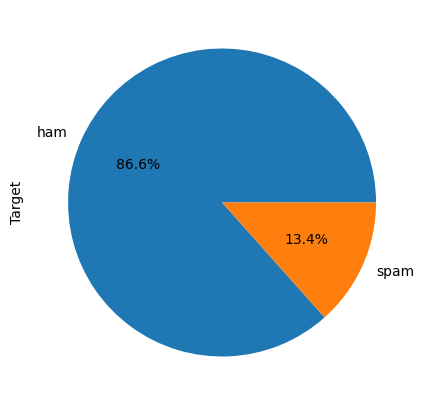

In [372]:
plt.figure(figsize=(5,5))
df['Target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [373]:
# Training the data to train with Algorithm
x=df['cleaned_text']
y=df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=11)


In [374]:
x_train.shape,x_test.shape

((5014,), (558,))

In [375]:
# dependent variable Converting categorical to numeric using label encoder
y_train.value_counts()

ham     4331
spam     683
Name: Target, dtype: int64

In [376]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
text_cate=le.fit_transform(y_train)
text_cate=pd.DataFrame(text_cate,index=y_train.index)
text_cate.columns=['Target_re']
# same applying to testing data
data=le.transform(y_test)
data=pd.DataFrame(data,index=y_test.index)
data.columns=['Target_re']

In [377]:
y_train=pd.concat([y_train,text_cate],axis=1)

In [378]:
y_test=pd.concat([y_test,data],axis=1)

In [379]:
y_train.head()

,Target,Target_re
3189,ham,0
1562,ham,0
4645,spam,1
2035,ham,0
2587,ham,0


In [380]:
y_train=y_train.drop(['Target'],axis=1)

In [381]:
y_test=y_test.drop(['Target'],axis=1)

In [382]:
y_train

,Target_re
3189,0
1562,0
4645,1
2035,0
2587,0
...,...
1293,0
4023,0
5200,1
3775,0


**Independent variable using countvector(Bag of words) converting text to numeric and change to array**


In [383]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train=cv.fit_transform(x_train)
x_train=x_train.toarray()
x_test=cv.transform(x_test)
x_test=x_test.toarray()

In [384]:
x_train.shape,x_test.shape

((5014, 7575), (558, 7575))

**Check the data is balanced or imbalanced not**

In [385]:
print('the value of dependent variable:',sum(y_train['Target_re']==1))
print('the value of dependent variable:',sum(y_train['Target_re']==0))

the value of dependent variable: 683
the value of dependent variable: 4331


In [386]:
print('the value of dependent variable:',sum(y_test['Target_re']==1))
print('the value of dependent variable:',sum(y_test['Target_re']==0))

the value of dependent variable: 64
the value of dependent variable: 494


**UPSAMPLING**

In [387]:
print('the value of dependent variable:',sum(y_train['Target_re']==1))
print('the value of dependent variable:',sum(y_train['Target_re']==0))
import imblearn
from imblearn.over_sampling import SMOTE
r=SMOTE(random_state=2)
x_train_up,y_train_up=r.fit_resample(x_train,y_train)
print('the value of dependent variable:',sum(y_train_up['Target_re']==1))
print('the value of dependent variable:',sum(y_train_up['Target_re']==0))

the value of dependent variable: 683
the value of dependent variable: 4331
the value of dependent variable: 4331
the value of dependent variable: 4331


In [388]:
print('the value of dependent variable:',sum(y_test['Target_re']==1))
print('the value of dependent variable:',sum(y_test['Target_re']==0))
import imblearn
from imblearn.over_sampling import SMOTE
r=SMOTE(random_state=2)
x_test_up,y_test_up=r.fit_resample(x_test,y_test)
print('the value of dependent variable:',sum(y_test_up['Target_re']==1))
print('the value of dependent variable:',sum(y_test_up['Target_re']==0))

the value of dependent variable: 64
the value of dependent variable: 494
the value of dependent variable: 494
the value of dependent variable: 494


**Model Development**

In [389]:
# Model Importing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [390]:
# Model fitting
mb=MultinomialNB()
lr=LogisticRegression()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
sv=SVC()


In [391]:
# Model Training
def naive(x_train_up,y_train_up,x_test_up,y_test_up):
  mb=MultinomialNB()
  mb.fit(x_train_up,y_train_up)
  print(f'Accurracy of Training data:{mb.score(x_train_up,y_train_up) }')
  print(f'Accurracy of Testing data:{mb.score(x_test_up,y_test_up) }')
  print()
  y_predict_text=mb.predict(x_test_up)
  print(f'confusion matrix of Testing data:{confusion_matrix(y_test_up,y_predict_text)}')
  print(f'classification of Testing data:{classification_report(y_test_up,y_predict_text)}')

In [392]:
def LR(x_train_up,y_train_up,x_test_up,y_test_up):
  lr=LogisticRegression()
  lr.fit(x_train_up,y_train_up)
  print(f'Accurracy of Training data:{lr.score(x_train_up,y_train_up) }')
  print(f'Accurracy of Testing data:{lr.score(x_test_up,y_test_up) }')
  print()
  y_predict_text=lr.predict(x_test_up)
  print(f'confusion matrix of Testing data:{confusion_matrix(y_test_up,y_predict_text)}')
  print(f'classification of Testing data:{classification_report(y_test_up,y_predict_text)}')

In [393]:
def RF(x_train_up,y_train_up,x_test_up,y_test_up):
  rf=RandomForestClassifier(criterion='entropy')
  rf.fit(x_train_up,y_train_up)
  print(f'Accurracy of Training data:{rf.score(x_train_up,y_train_up) }')
  print(f'Accurracy of Testing data:{rf.score(x_test_up,y_test_up) }')
  print()
  y_predict_text=rf.predict(x_test_up)
  print(f'confusion matrix of Testing data:{confusion_matrix(y_test_up,y_predict_text)}')
  print(f'classification of Testing data:{classification_report(y_test_up,y_predict_text)}')

In [394]:
def DT(x_train_up,y_train_up,x_test_up,y_test_up):
  dt=DecisionTreeClassifier(criterion='entropy')
  dt.fit(x_train_up,y_train_up)
  print(f'Accurracy of Testing data:{dt.score(x_train_up,y_train_up) }')
  print(f'Accurracy of Testing data:{dt.score(x_test_up,y_test_up) }')
  print()
  y_predict_text=dt.predict(x_test_up)
  print(f'confusion matrix of Testing data:{confusion_matrix(y_test_up,y_predict_text)}')
  print(f'classification of Testing data:{classification_report(y_test_up,y_predict_text)}')

In [395]:
def SVM(x_train_up,y_train_up,x_test_up,y_test_up):
  sv=SVC(C=1.0,kernel='rbf')
  sv.fit(x_train_up,y_train_up)
  print(f'Accurracy of Training data:{sv.score(x_train_up,y_train_up) }')
  print(f'Accurracy of Testing data:{sv.score(x_test_up,y_test_up) }')
  print()
  y_predict_text=sv.predict(x_test_up)
  print(f'confusion matrix of Testing data:{confusion_matrix(y_test_up,y_predict_text)}')
  print(f'classification of Testing data:{classification_report(y_test_up,y_predict_text)}')

In [396]:
def tech(x_train_up,y_train_up,x_test_up,y_test_up):
  print("---------------- Support Vector Machine---------")
  SVM(x_train_up,y_train_up,x_test_up,y_test_up)
  print('*'*80)
  print("---------------- Navie Bay'es---------")
  naive(x_train_up,y_train_up,x_test_up,y_test_up)
  print('*'*80)
  print("---------------- LogisticRegression---------")
  LR(x_train_up,y_train_up,x_test_up,y_test_up)
  print('*'*80)
  print("---------------- RandomForestClassifier---------")
  RF(x_train_up,y_train_up,x_test_up,y_test_up)
  print('*'*80)
  print("---------------- DecisionTreeClassifier---------")
  DT(x_train_up,y_train_up,x_test_up,y_test_up)
  print('*'*80)




In [397]:
tech(x_train_up,y_train_up,x_test_up,y_test_up)

---------------- Support Vector Machine---------
Accurracy of Training data:0.9784114523204802
Accurracy of Testing data:0.9271255060728745

confusion matrix of Testing data:[[444  50]
 [ 22 472]]
classification of Testing data:              precision    recall  f1-score   support

           0       0.95      0.90      0.93       494
           1       0.90      0.96      0.93       494

    accuracy                           0.93       988
   macro avg       0.93      0.93      0.93       988
weighted avg       0.93      0.93      0.93       988

********************************************************************************
---------------- Navie Bay'es---------
Accurracy of Training data:0.8840914338489956
Accurracy of Testing data:0.8410931174089069

confusion matrix of Testing data:[[479  15]
 [142 352]]
classification of Testing data:              precision    recall  f1-score   support

           0       0.77      0.97      0.86       494
           1       0.96      0.71    

In [398]:
# select the ROC curve and AUC curve
from sklearn.metrics import roc_auc_score,roc_curve
# model fitting

rf.fit(x_train_up,y_train_up)
dt.fit(x_train_up,y_train_up)
lr.fit(x_train_up,y_train_up)
mb.fit(x_train_up,y_train_up)
# model testing for roc curve

y_predict_rf=rf.predict_proba(x_test_up)[:,1]
y_predict_dt=dt.predict_proba(x_test_up)[:,1]
y_predict_lr=lr.predict_proba(x_test_up)[:,1]
y_predict_mb=mb.predict_proba(x_test_up)[:,1]

In [399]:
# model test to roc curve
fprr,tprr,threshold=roc_curve(y_test_up,y_predict_rf)
fprdt,tprdt,threshold=roc_curve(y_test_up,y_predict_dt)
fprlr,tprlr,threshold=roc_curve(y_test_up,y_predict_lr)
fprmb,tprmb,threshold=roc_curve(y_test_up,y_predict_mb)

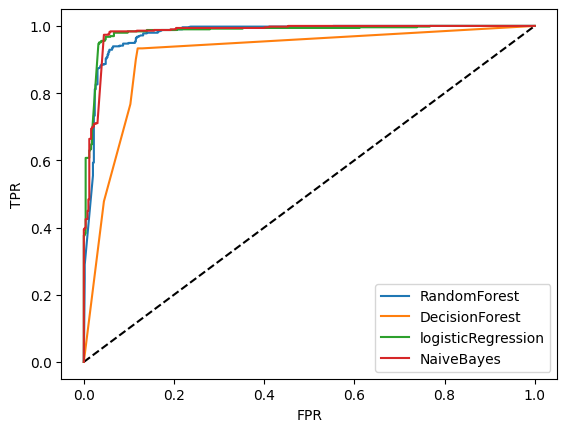

In [400]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fprr,tprr,label='RandomForest')
plt.plot(fprdt,tprdt,label='DecisionForest')
plt.plot(fprlr,tprlr,label='logisticRegression')
plt.plot(fprmb,tprmb,label='NaiveBayes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)
plt.show()

both LR gives good result ...Lets Take Logistic Regression

In [401]:
# saving the data
import pickle
with open('text.pkl','wb') as f:
  pickle.dump(cv,f)

In [402]:
ch=pickle.load(open('text.pkl','rb'))

In [403]:
a = ['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']
texts=ch.transform(a)
texts=texts.toarray()

In [405]:
lr.predict(texts)

array([1])

In [ ]:
with open('spam.pkl','wb') as p:
    pickle.dump(lr,p)

In [ ]:
sol = pickle.load(open('spam.pkl','rb'))


In [ ]:
sol.predict(b)